In [43]:
import numpy as np
import matplotlib.pylab as plt

In [44]:
# f(x0, x1) = x0² + x1²
def function_2(x):
    return x[0]**2 + x[1]**2
    # or return np.sum(x**2)

In [45]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)  # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val  # 값 복원

    return grad

In [46]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append(x.copy())
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

In [47]:
def plotting(x_history):
    plt.plot([-5, 5], [0, 0], '--b')
    plt.plot([0, 0], [-5, 5], '--b')
    plt.plot(x_history[:, 0], x_history[:, 1], 'o')

    # plt.xlim(-5, 5)
    # plt.ylim(-5, 5)
    plt.xlabel("X0")
    plt.ylabel("X1")
    plt.show()

[-6.11110793e-10  8.14814391e-10]


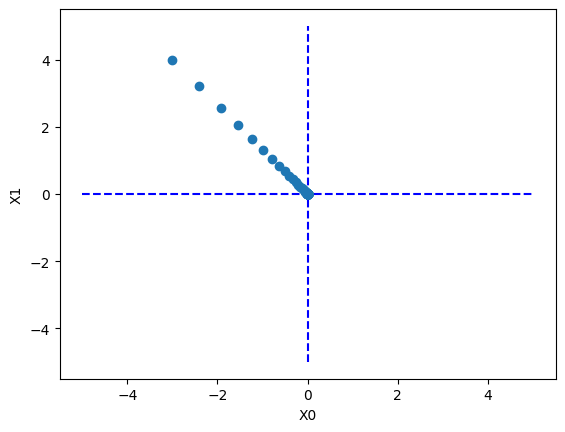

[-2.58983747e+13 -1.29524862e+12]


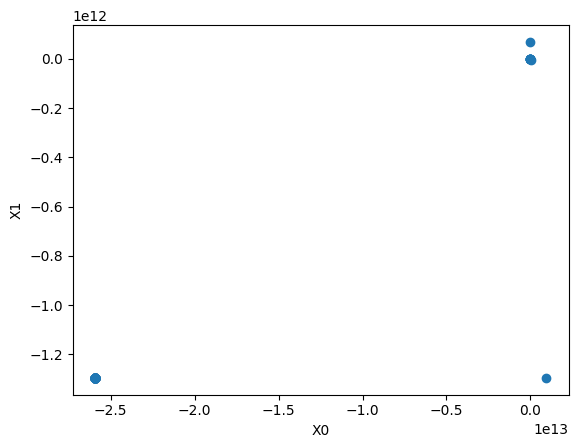

[-2.99999994  3.99999992]


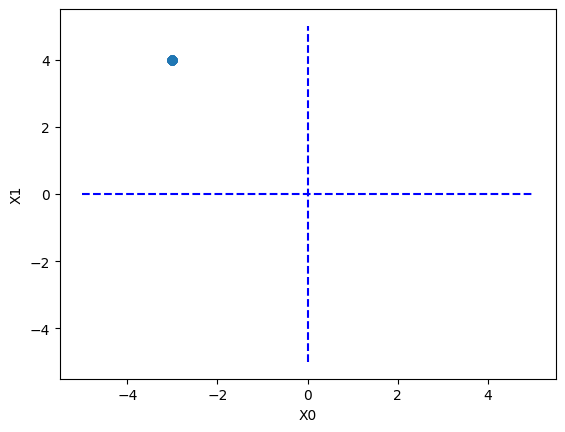

In [48]:
# 경사법으로 f(x0, x1) = x0² + x1²의 최솟값을 구해라
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=0.1)
print(x)  # [ -6.11110793e-10   8.14814391e-10]
plotting(x_history)

# 학습률이 너무 큼
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=10.0)
print(x)  # [ -2.58983747e+13  -1.29524862e+12] 발산함
plotting(x_history)

# 학습률이 너무 작음
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=1e-10)
print(x)  # [-2.99999994  3.99999992] 거의 변화 없음
plotting(x_history)
